In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

# Linear Regression

#### 2)

In [0]:
x = np.array([1,2])
y = np.array([1,3])

In [0]:
theta = np.polyfit(x, y, 1)

In [0]:
print(theta)

[ 2. -1.]


In [0]:
x = np.array([3,1])
y = np.array([-2,-1])
theta = np.polyfit(x, y, 1)
print(theta)

[-0.5 -0.5]


* Repeat for (1) : Five iteration

In [0]:
thet = [0,0]
alpha = 0.1
for i in range(5):
  gradient = np.array([(5*thet[0]+3*thet[1]-7)/2,(3*thet[0]+2*thet[1]-4)/2])
  thet = thet - alpha*gradient
  print('{} iteration: theta={}'.format(i+1,thet))

1 iteration: theta=[0.35 0.2 ]
2 iteration: theta=[0.5825 0.3275]
3 iteration: theta=[0.73775  0.407375]
4 iteration: theta=[0.84220625 0.455975  ]
5 iteration: theta=[0.91325844 0.48404656]


#### 3)

In [0]:
noise = np.random.normal(0,1,10)
x = (np.arange(10)-5)/2
y = np.power(x,3) - np.power(x,2) + 1 + noise

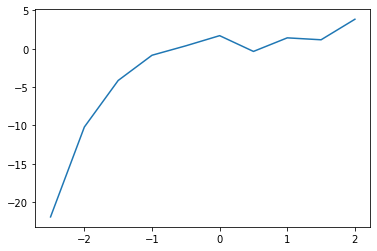

In [0]:
plt.plot(x,y)

* Degree 1

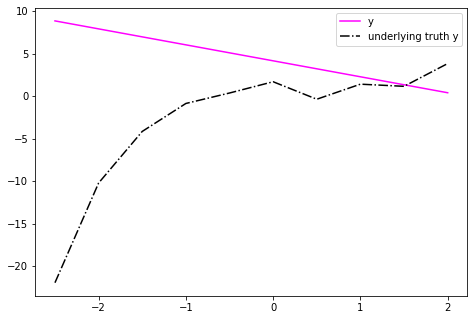

In [0]:
deg1_co = np.polyfit(x,y,1)
eva_1 = poly.polyval(x,deg1_co)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, eva_1, label='y', linestyle = '-', color='magenta')
ax.plot(x, y, label='underlying truth y', linestyle= '-.', color='black')
ax.legend()

* Degree 2

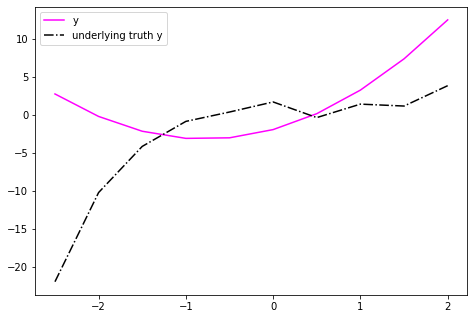

In [0]:
deg2_co = np.polyfit(x,y,2)
eva_2 = poly.polyval(x,deg2_co)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, eva_2, label='y', linestyle = '-', color='magenta')
ax.plot(x, y, label='underlying truth y', linestyle= '-.', color='black')
ax.legend()

* Degree 3

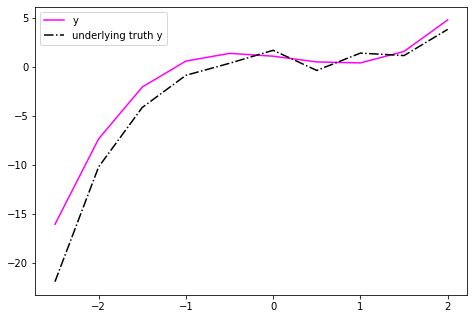

In [0]:
deg3_co = np.polyfit(x,y,3)
eva_3 = poly.polyval(x,deg3_co)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, eva_3, label='y', linestyle = '-', color='magenta')
ax.plot(x, y, label='underlying truth y', linestyle= '-.', color='black')
ax.legend()

* Degree 4

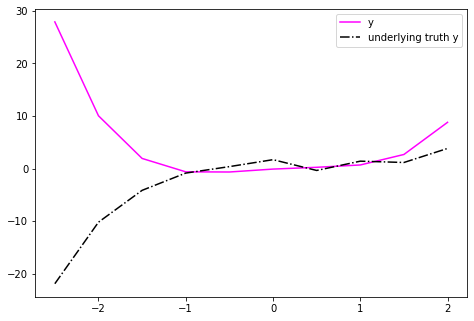

In [0]:
deg4_co = np.polyfit(x,y,4)
eva_4 = poly.polyval(x,deg4_co)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, eva_4, label='y', linestyle = '-', color='magenta')
ax.plot(x, y, label='underlying truth y', linestyle= '-.', color='black')
ax.legend()

* Degree 5

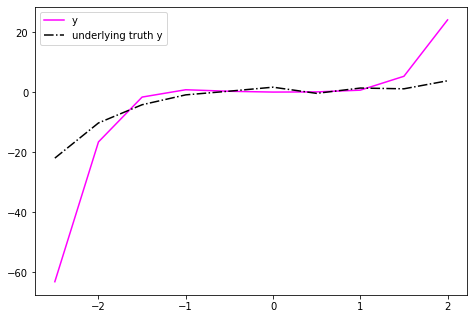

In [0]:
deg5_co = np.polyfit(x,y,5)
eva_5 = poly.polyval(x,deg5_co)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, eva_5, label='y', linestyle = '-', color='magenta')
ax.plot(x, y, label='underlying truth y', linestyle= '-.', color='black')
ax.legend()

# 3. Classification on MNIST

#### (1)

In [0]:
from tensorflow.keras.datasets import mnist
import cvxpy as cp

In [0]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

#choose pictures of number 3 and number 5
(train_images,train_labels),(test_images,test_labels) = mnist.load_data() # include all numbers from 0 to 9
index_train = np.where((train_labels==3)|(train_labels==5)) #index of numbers 3 and 5 in training data 
index_test = np.where((test_labels==3)|(test_labels==5)) #index of numbers 3 and 5 in test data 
train_images_35 = train_images[index_train]
train_images_35 = train_images_35.reshape((len(train_images_35),train_images_35[1].size))

#label of number 3: -1; label of number 5: +1
train_labels_35=train_labels[index_train].astype('int')
test_images_35=test_images[index_test]
test_images_35=test_images_35.reshape((len(test_images_35), train_images_35[1].size))
test_labels_35=test_labels[index_test].astype('int')

#change labels from '3' and '5' to '-1' and '+1'
train_labels_35[np.where(train_labels_35==3)] = -1
train_labels_35[np.where(train_labels_35==5)] = 1
test_labels_35[np.where(test_labels_35==3)] = -1
test_labels_35[np.where(test_labels_35==5)] = 1

train_images_35 = train_images_35/255  # normalizing
test_images_35 = test_images_35/255   # normalizing 

train_images_35_hw2 = train_images_35[range(2000)] # subset of the training data
train_labels_35_hw2 = train_labels_35[range(2000)] # subset of the training data

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
w = cp.Variable(784)
b = cp.Variable()
objective = cp.Minimize(cp.norm(w))
constraints = []

for i in range(2000):
  constraints.append(train_labels_35_hw2[i]*( w.T*(train_images_35_hw2[i])+b ) >=1 )

prob = cp.Problem(objective, constraints)
result = prob.solve()

optimal_w = w.value
optimal_b = b.value

################## training error
mis_clas_train = 0
for i in range(2000):
  if( (optimal_w.dot(train_images_35_hw2[i])+optimal_b) * (train_labels_35_hw2[i]) <=0 ):
    mis_clas_train += 1
training_error_rate = mis_clas_train/2000
print('The rate of training error is {}'.format(training_error_rate))

################## testing error
mis_clas_test = 0
for i in range(1902):
  if( (optimal_w.dot(test_images_35[i])+optimal_b) * (test_labels_35[i]) <=0 ):
    mis_clas_test += 1
testing_error_rate = mis_clas_test/1902
print('The rate of testing error is {}'.format(testing_error_rate))

The rate of training error is 0.0
The rate of testing error is 0.06361724500525763


#### (2)

In [0]:
alpha = cp.Variable(2000)
alpha_sum = cp.sum(alpha)

x_inner_pro = np.zeros((2000,2000))
for i in range(2000):
  for j in range(2000):
    x_inner_pro[i,j] = train_images_35_hw2[i].dot(train_images_35_hw2[j])
second_term = cp.quad_form(cp.multiply(train_labels_35_hw2,alpha),x_inner_pro)
objective = cp.Maximize(alpha_sum - (second_term/2))

condition = cp.multiply(alpha,train_labels_35_hw2)
constraints = []
                    #### constraint
constraints += [alpha>=0, cp.sum(condition)==0]
prob = cp.Problem(objective,constraints)
result = prob.solve()

In [0]:
optimal_alpha = alpha.value
optimal_w=np.zeros(784)
for i in range(2000):
  optimal_w += optimal_w+optimal_alpha[i]*train_labels_35_hw2[i]*train_images_35_hw2[i]

#### y=1 and y=-1 can calculate optimal b
y_postive = []
y_negative = []
for i in range(2000):
  if (train_labels_35_hw2[i]==1):
    y_postive.append(optimal_w.dot(train_images_35_hw2[i]))
  else:
    y_negative.append(optimal_w.dot(train_images_35_hw2[i]))
optimal_b=-1*(y_negative[np.argmax(y_negative)]+y_postive[np.argmin(y_postive)])/2

##### evaluation on train and test data
################## training error
mis_clas_train = 0
for i in range(2000):
  if( (optimal_w.dot(train_images_35_hw2[i])+optimal_b) * (train_labels_35_hw2[i]) <=0 ):
    mis_clas_train += 1
training_error_rate = mis_clas_train/2000
print('The rate of training error is {}'.format(training_error_rate))

################## testing error
mis_clas_test = 0
for i in range(1902):
  if( (optimal_w.dot(test_images_35[i])+optimal_b) * (test_labels_35[i]) <=0 ):
    mis_clas_test += 1
testing_error_rate = mis_clas_test/1902
print('The rate of testing error is {}'.format(testing_error_rate))

The rate of training error is 0.0
The rate of testing error is 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in add
  after removing the cwd from sys.path.


#### (3)

In [0]:
kernal = np.zeros((2000,2000))
for i in range(2000):
  for j in range(2000):
    kernal[i,j] = np.exp( -1*np.linalg.norm(train_images_35_hw2[i]-train_images_35_hw2[j])**2/2 ) 

In [0]:
alpha = cp.Variable(2000)
alpha_sum = cp.sum(alpha)

second_term = cp.quad_form(cp.multiply(train_labels_35_hw2,alpha),kernal)
objective = cp.Maximize(alpha_sum - (second_term/2))

condition = cp.multiply(alpha,train_labels_35_hw2)

constraints = []
constraints += [alpha>=0, cp.sum(condition)==0]
prob = cp.Problem(objective,constraints)
result = prob.solve()

In [0]:
optimal_alpha = alpha.value

#### y=1 and y=-1 can calculate optimal b
y_postive = []
y_negative = []
for i in range(2000):
  if (train_labels_35_hw2[i]==1):
    y_postive.append( optimal_alpha.dot(train_labels_35_hw2[i]).dot(kernal[i]) )
  else:
    y_negative.append( optimal_alpha.dot(train_labels_35_hw2[i]).dot(kernal[i]) )
optimal_b=(y_negative[np.argmax(y_negative)]+y_postive[np.argmin(y_postive)])/2*-1

##### evaluation on train and test data
################## training error
mis_clas_train = 0
for i in range(2000):
  if( (optimal_alpha.dot(train_labels_35_hw2[i]).dot(kernal[i])+optimal_b) * (train_labels_35_hw2[i]) <=0 ): 
    mis_clas_train += 1
training_error_rate = mis_clas_train/2000
print('The rate of training error is {}'.format(training_error_rate))

################## testing error
mis_clas_test = 0
for i in range(1902):
  if( (optimal_alpha.dot(test_labels_35[i]).dot(kernal[i])+optimal_b) * (test_labels_35[i]) <=0 ):
    mis_clas_test += 1
testing_error_rate = mis_clas_test/1902
print('The rate of testing error is {}'.format(testing_error_rate))

The rate of training error is 0.0
The rate of testing error is 0.0


#### (4)

* K nearest neighbor

In [0]:
import pandas as pd

In [0]:

def euclidean_distance(array1, array2):
    return np.linalg.norm(array1 - array2)

def get_dist_test(train_data, test_data, label):         
    dist_test = np.array(np.zeros([1903,2000]))    # distance array for test data with label in the last row
    index = 0                               # index to store the distance in dist_test array
    dist = list()                   # create empty distance list
    
    for test in test_data:
        for train in train_data:
            dist.append(euclidean_distance(test, train))
        dist_test[index,] = dist
        dist = list()
        index += 1
    dist_test[-1,] = label
    return dist_test

def get_dist_train(train_data, label):         
    dist_train = np.array(np.zeros([2001,2000]))   # distance array for training data with label in the last row
    index = 0                                                # index to store the distance in dist_train array
    dist = list()                                                 # create empty distance list
    for test in train_data:
        for train in train_data:
            dist.append(euclidean_distance(test, train))
        dist_train[index,] = dist
        dist = list()
        index += 1
    dist_train[-1,] = label
    return dist_train

dist_label_list_training = get_dist_train(train_images_35_hw2, train_labels_35_hw2)
dist_label_list_for_testing = get_dist_test(train_images_35_hw2,test_images_35, train_labels_35_hw2)

def predict(k_num, label_dis_arr):
    prediction = list()    # predict list
    label_with_dis = pd.DataFrame(data=np.zeros([2000,2]),columns=['label','distance'])     #data frame for label and distance
    label_with_dis['label'] = label_dis_arr[-1]        # assign label_and_diastance data frame with label
    
    for i in label_dis_arr[:-1]:
        label_with_dis['distance'] = i                               # assign dist list column to distance
        df = label_with_dis.sort_values(by='distance')                 ## sort the data base on distance                                                           
        predict_label = list(df.head(k_num)['label'])                ## select distance based on k_number and find correspond label
        
        if predict_label.count(-1) > predict_label.count(1):
            prediction.append(-1)
        else:
            prediction.append(1)
    return prediction

for i in range(3,6,2):
    precd_2 = predict(i, dist_label_list_training)
    precd_2 = np.array(precd_2)
    correct_num_2 = np.equal(precd_2, train_labels_35_hw2)
    print('training error with k = {a} is {b}'.format(a=i, b=1-np.count_nonzero(correct_num_2==True)/2000))
print('\n')

for i in range(3,6,2):
    precd = predict(i, dist_label_list_for_testing)
    precd = np.array(precd)
    correct_num = np.equal(precd, test_labels_35)
    print('test error with k = {a} is {b}'.format(a=i, b=1-np.count_nonzero(correct_num==True)/1902))

training error with k = 3 is 0.009499999999999953
training error with k = 5 is 0.010000000000000009


test error with k = 3 is 0.02050473186119872
test error with k = 5 is 0.02103049421661407


In [0]:
Error_Summaty_Table = pd.DataFrame(data=np.zeros([2,5]),columns=['optimal_margin_classifier','dual form','dual form with kernal','KNN (K=3)','KNN (K=5)'])
Error_Summaty_Table.index = ['training error','testing error']
Error_Summaty_Table['optimal_margin_classifier'] = [0.0,0.06361724500525763]
Error_Summaty_Table['dual form'] = [0.0,0.0]
Error_Summaty_Table['dual form with kernal'] = [0.0,0.0]
Error_Summaty_Table['KNN (K=3)'] = [0.009499999999999953,0.02050473186119872]
Error_Summaty_Table['KNN (K=5)'] = [0.010000000000000009,0.02103049421661407]
Error_Summaty_Table

,optimal_margin_classifier,dual form,dual form with kernal,KNN (K=3),KNN (K=5)
training error,0.000000,0.0,0.0,0.009500,0.01000
testing error,0.063617,0.0,0.0,0.020505,0.02103


#### (5)

> Repeat task 1 - optimal margin classifier


* C = 1

In [0]:
w = cp.Variable(784)
b = cp.Variable()
slack = cp.Variable(11552)
slack_sum = cp.sum(slack)
c = 1
norm_dist = cp.norm(w)
objective = cp.Minimize(norm_dist+c*slack_sum)

constraints = []
for i in range(11552):
  constraints.append(train_labels_35[i]*(w.T*(train_images_35[i])+b)+slack[i]>=1)
  constraints.append(slack[i]>=0)
prob = cp.Problem(objective, constraints)
result = prob.solve()

optimal_w = w.value
optimal_b = b.value
################## training error
mis_clas_train = 0
for i in range(11552):
  if( (optimal_w.dot(train_images_35[i])+optimal_b) * (train_labels_35[i]) <=0 ):
    mis_clas_train += 1
training_error_rate = mis_clas_train/11552
print('The rate of training error with c=1 is {}'.format(training_error_rate))

################## testing error
mis_clas_test = 0
for i in range(1902):
  if( (optimal_w.dot(test_images_35[i])+optimal_b) * (test_labels_35[i]) <=0 ):
    mis_clas_test += 1
testing_error_rate = mis_clas_test/1902
print('The rate of testing error with c=1 is {}'.format(testing_error_rate))

The rate of training error with c=1 is 0.019823407202216068
The rate of testing error with c=1 is 0.03890641430073607


* C = 3

In [0]:
w = cp.Variable(784)
b = cp.Variable()
slack = cp.Variable(11552)
slack_sum = cp.sum(slack)
c = 3
norm_dist = cp.norm(w)
objective = cp.Minimize(norm_dist+c*slack_sum)

constraints = []
for i in range(11552):
  constraints.append(train_labels_35[i]*(w.T*(train_images_35[i])+b)+slack[i]>=1)
  constraints.append(slack[i]>=0)
prob = cp.Problem(objective, constraints)
result = prob.solve()

optimal_w = w.value
optimal_b = b.value
################## training error
mis_clas_train = 0
for i in range(11552):
  if( (optimal_w.dot(train_images_35[i])+optimal_b) * (train_labels_35[i]) <=0 ):
    mis_clas_train += 1
training_error_rate = mis_clas_train/11552
print('The rate of training error with c=3 is {}'.format(training_error_rate))

################## testing error
mis_clas_test = 0
for i in range(1902):
  if( (optimal_w.dot(test_images_35[i])+optimal_b) * (test_labels_35[i]) <=0 ):
    mis_clas_test += 1
testing_error_rate = mis_clas_test/1902
print('The rate of testing error with c=3 is {}'.format(testing_error_rate))

The rate of training error with c=3 is 0.019217451523545707
The rate of testing error with c=3 is 0.04153522607781283


* C = 5

In [0]:
w = cp.Variable(784)
b = cp.Variable()
slack = cp.Variable(11552)
slack_sum = cp.sum(slack)
c = 5
norm_dist = cp.norm(w)
objective = cp.Minimize(norm_dist+c*slack_sum)

constraints = []
for i in range(11552):
  constraints.append(train_labels_35[i]*(w.T*(train_images_35[i])+b)+slack[i]>=1)
  constraints.append(slack[i]>=0)
prob = cp.Problem(objective, constraints)
result = prob.solve()

optimal_w = w.value
optimal_b = b.value
################## training error
mis_clas_train = 0
for i in range(11552):
  if( (optimal_w.dot(train_images_35[i])+optimal_b) * (train_labels_35[i]) <=0 ):
    mis_clas_train += 1
training_error_rate = mis_clas_train/11552
print('The rate of training error with c=5 is {}'.format(training_error_rate))

################## testing error
mis_clas_test = 0
for i in range(1902):
  if( (optimal_w.dot(test_images_35[i])+optimal_b) * (test_labels_35[i]) <=0 ):
    mis_clas_test += 1
testing_error_rate = mis_clas_test/1902
print('The rate of testing error with c=5 is {}'.format(testing_error_rate))

The rate of training error with c=5 is 0.018351800554016622
The rate of testing error with c=5 is 0.04153522607781283


> Repeat task 2 - dual form of the optimal margin *classifier*


* C = 1

In [0]:
x_inner_pro = np.zeros((11552,11552))
for i in range(11552):
  for j in range(11552):
    x_inner_pro[i,j] = np.inner(train_images_35[i], train_images_35[j])

In [0]:
alpha = cp.Variable(11552)
c = 1
second_term = cp.quad_form(cp.multiply(train_labels_35,alpha),x_inner_pro)
objective = cp.Maximize(cp.sum(alpha) - (second_term/2))
condition = cp.multiply(alpha,train_labels_35)                   
constraints = [alpha>=0, alpha<=c, cp.sum(condition)==0]

prob = cp.Problem(objective,constraints)
result = prob.solve()

#############################################
optimal_alpha = alpha.value
optimal_w=np.zeros(784)
for i in range(11552):
  optimal_w += optimal_w+optimal_alpha[i]*train_labels_35[i]*train_images_35[i]

#### y=1 and y=-1 can calculate optimal b
y_postive = []
y_negative = []
for i in range(11552):
  if (train_labels_35[i]==1):
    y_postive.append(optimal_w.dot(train_images_35[i]))
  else:
    y_negative.append(optimal_w.dot(train_images_35[i]))
optimal_b=-1*(y_negative[np.argmax(y_negative)]+y_postive[np.argmin(y_postive)])/2

##### evaluation on train and test data
################## training error
mis_clas_train = 0
for i in range(11552):
  if( (optimal_w.dot(train_images_35[i])+optimal_b) * (train_labels_35[i]) <=0 ):
    mis_clas_train += 1
training_error_rate = mis_clas_train/11552
print('The rate of training error with c=1 is {}'.format(training_error_rate))

################## testing error
mis_clas_test = 0
for i in range(1902):
  if( (optimal_w.dot(test_images_35[i])+optimal_b) * (test_labels_35[i]) <=0 ):
    mis_clas_test += 1
testing_error_rate = mis_clas_test/1902
print('The rate of testing error with c=1 is {}'.format(testing_error_rate))

In [0]:
print(second_term.curvature)

UNKNOWN


* C = 3

In [0]:
 ## unknow curvature (As same as the case with C=1)
 print(second_term.curvature)

UNKNOWN


* C = 5

In [0]:
 ## unknow curvature (As same as the case with C=1)
 print(second_term.curvature)

UNKNOWN


> Repeat task 3 - dual form with kernal


* C = 1

In [0]:
kernal = np.zeros((11552,11552))
for i in range(11552):
  for j in range(11552):
    kernal[i,j] = np.exp( -1*np.linalg.norm(train_images_35[i]-train_images_35[j])**2/2 ) 

In [0]:
alpha = cp.Variable(11552)
c = 1
second_term = cp.quad_form(cp.multiply(train_labels_35,alpha),kernal)
objective = cp.Maximize(cp.sum(alpha) - (second_term/2))

condition = cp.multiply(alpha,train_labels_35)

constraints = [alpha>=0, alpha<=c, cp.sum(condition)==0]
prob = cp.Problem(objective,constraints)
result = prob.solve()

In [0]:
optimal_alpha = alpha.value

#### y=1 and y=-1 can calculate optimal b
y_postive = []
y_negative = []
for i in range(11552):
  if (train_labels_35[i]==1):
    y_postive.append( optimal_alpha.dot(train_labels_35[i]).dot(kernal[i]) )
  else:
    y_negative.append( optimal_alpha.dot(train_labels_35[i]).dot(kernal[i]) )
optimal_b=(y_negative[np.argmax(y_negative)]+y_postive[np.argmin(y_postive)])/2*-1

##### evaluation on train and test data
################## training error
mis_clas_train = 0
for i in range(11552):
  if( (optimal_alpha.dot(train_labels_35[i]).dot(kernal[i])+optimal_b) * (train_labels_35[i]) <=0 ): 
    mis_clas_train += 1
training_error_rate = mis_clas_train/2000
print('The rate of training error with c=1 is {}'.format(training_error_rate))

################## testing error
mis_clas_test = 0
for i in range(1902):
  if( (optimal_alpha.dot(test_labels_35[i]).dot(kernal[i])+optimal_b) * (test_labels_35[i]) <=0 ):
    mis_clas_test += 1
testing_error_rate = mis_clas_test/1902
print('The rate of testing error with c=1 is {}'.format(testing_error_rate))

The rate of training error with c=1 is 0.0
The rate of testing error with c=1 is 0.0


* C=3

In [0]:
alpha = cp.Variable(11552)
c = 3
second_term = cp.quad_form(cp.multiply(train_labels_35,alpha),kernal)
objective = cp.Maximize(cp.sum(alpha) - (second_term/2))

condition = cp.multiply(alpha,train_labels_35)

constraints = [alpha>=0, alpha<=c, cp.sum(condition)==0]
prob = cp.Problem(objective,constraints)
result = prob.solve()

In [0]:
optimal_alpha = alpha.value

#### y=1 and y=-1 can calculate optimal b
y_postive = []
y_negative = []
for i in range(11552):
  if (train_labels_35[i]==1):
    y_postive.append( optimal_alpha.dot(train_labels_35[i]).dot(kernal[i]) )
  else:
    y_negative.append( optimal_alpha.dot(train_labels_35[i]).dot(kernal[i]) )
optimal_b=(y_negative[np.argmax(y_negative)]+y_postive[np.argmin(y_postive)])/2*-1

##### evaluation on train and test data
################## training error
mis_clas_train = 0
for i in range(11552):
  if( (optimal_alpha.dot(train_labels_35[i]).dot(kernal[i])+optimal_b) * (train_labels_35[i]) <=0 ): 
    mis_clas_train += 1
training_error_rate = mis_clas_train/2000
print('The rate of training error with c=3 is {}'.format(training_error_rate))

################## testing error
mis_clas_test = 0
for i in range(1902):
  if( (optimal_alpha.dot(test_labels_35[i]).dot(kernal[i])+optimal_b) * (test_labels_35[i]) <=0 ):
    mis_clas_test += 1
testing_error_rate = mis_clas_test/1902
print('The rate of testing error with c=3 is {}'.format(testing_error_rate))

The rate of training error with c=3 is 0.0
The rate of testing error with c=3 is 0.0


* C = 5

In [0]:
alpha = cp.Variable(11552)
c = 5
second_term = cp.quad_form(cp.multiply(train_labels_35,alpha),kernal)
objective = cp.Maximize(cp.sum(alpha) - (second_term/2))

condition = cp.multiply(alpha,train_labels_35)

constraints = [alpha>=0, alpha<=c, cp.sum(condition)==0]
prob = cp.Problem(objective,constraints)
result = prob.solve()

In [0]:
optimal_alpha = alpha.value

#### y=1 and y=-1 can calculate optimal b
y_postive = []
y_negative = []
for i in range(11552):
  if (train_labels_35[i]==1):
    y_postive.append( optimal_alpha.dot(train_labels_35[i]).dot(kernal[i]) )
  else:
    y_negative.append( optimal_alpha.dot(train_labels_35[i]).dot(kernal[i]) )
optimal_b=(y_negative[np.argmax(y_negative)]+y_postive[np.argmin(y_postive)])/2*-1

##### evaluation on train and test data
################## training error
mis_clas_train = 0
for i in range(11552):
  if( (optimal_alpha.dot(train_labels_35[i]).dot(kernal[i])+optimal_b) * (train_labels_35[i]) <=0 ): 
    mis_clas_train += 1
training_error_rate = mis_clas_train/2000
print('The rate of training error with c=5 is {}'.format(training_error_rate))

################## testing error
mis_clas_test = 0
for i in range(1902):
  if( (optimal_alpha.dot(test_labels_35[i]).dot(kernal[i])+optimal_b) * (test_labels_35[i]) <=0 ):
    mis_clas_test += 1
testing_error_rate = mis_clas_test/1902
print('The rate of testing error with c=5 is {}'.format(testing_error_rate))

The rate of training error with c=5 is 0.0
The rate of testing error with c=5 is 0.0


In [0]:
Error_Summaty_Table2 = pd.DataFrame(data=np.zeros([6,5]),columns=['optimal_margin_classifier','dual form','dual form with kernal','KNN (K=3)','KNN (K=5)'])
Error_Summaty_Table2.index = ['training error(c=1)','testing error(c=1)','training error(c=3)','testing error(c=3)','training error(c=5)','testing error(c=5)']
Error_Summaty_Table2['optimal_margin_classifier'] = [0.19823407202216068,0.03890641430073607,0.019217451523545707,0.04153522607781283,0.018351800554016622,0.04153522607781283]
Error_Summaty_Table2['dual form'] = ['unknow curvature(non-convex)','unknow curvature(non-convex)','unknow curvature(non-convex)','unknow curvature(non-convex)','unknow curvature(non-convex)',
'unknow curvature(non-convex)']
Error_Summaty_Table2['dual form with kernal'] = [0,0,0,0,0,0]
Error_Summaty_Table2['KNN (K=3)'] = [0.0050208,0.0157729,0.0050208,0.0157729,0.0050208,0.0157729]
Error_Summaty_Table2['KNN (K=5)'] = [0.0071849,0.0136698,0.0071849,0.0136698,0.0071849,0.0136698]
Error_Summaty_Table2


,optimal_margin_classifier,dual form,dual form with kernal,KNN (K=3),KNN (K=5)
training error(c=1),0.198234,unknow curvature(non-convex),0,0.005021,0.007185
testing error(c=1),0.038906,unknow curvature(non-convex),0,0.015773,0.013670
training error(c=3),0.019217,unknow curvature(non-convex),0,0.005021,0.007185
testing error(c=3),0.041535,unknow curvature(non-convex),0,0.015773,0.013670
training error(c=5),0.018352,unknow curvature(non-convex),0,0.005021,0.007185
testing error(c=5),0.041535,unknow curvature(non-convex),0,0.015773,0.013670


In [0]:
#dual kernel 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

#load data and preprocess data
mnist = tf.keras.datasets.mnist
(train_images , train_labels), (test_images, test_labels) = mnist.load_data()
#choose pictures of number 3 and number 5
index_train = np.where( (train_labels ==3) | (train_labels ==5) )
index_test = np.where( (test_labels ==3) | (test_labels ==5) )
#label of number 3: -1; label of number 5: +1
train_images_35 = train_images[index_train]
train_images_35 = train_images_35.reshape((len(train_images_35), train_images_35[1].size))
train_labels_35 = train_labels[index_train].astype('int')
test_images_35 = test_images[index_test]
test_images_35 = test_images_35.reshape((len(test_images_35), train_images_35[1].size))
test_labels_35 = test_labels[index_test].astype('int')
#change labels from '3' to '-1', change labels from '5' to '+1'
train_labels_35[np.where(train_labels_35==3)] = -1
train_labels_35[np.where(train_labels_35==5)] = 1
test_labels_35[np.where(test_labels_35==3)] = -1
test_labels_35[np.where(test_labels_35==5)] = 1

train_images_35=train_images_35/255 #normalizing feature vector
test_images_35=test_images_35/255

train_images_35_hw2=train_images_35[range(2000)] #choose a subset of the entire training dataset
train_labels_35_hw2=train_labels_35[range(2000)]

m = train_images_35_hw2.shape[0]
y = train_labels_35_hw2
y = y.reshape(-1,1) * 1.
X = train_images_35_hw2
# form kernel
sigma = 1
K = np.zeros((m, m))
for i in range(m):
  for j in range(m):
    K[i,j] = np.exp(-(np.linalg.norm(X[i,:]-X[j,:]))**2 / (2 * (sigma ** 2)))
P = y@y.T * K
q = -np.ones(m)
diag = np.ones(m)
G = np.ma.diag(-diag)
h = np.zeros(m)
A = y.T
b = 0
# Define and solve the CVXPY problem.
a = cp.Variable(m)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(a, P) + q.T @ a),
                 [G @ a <= h,
                  A @ a == b])
prob.solve()
a = a.value
a = a.reshape(-1,1)
# Print result.
print("The optimal value is", prob.value)
print("A solution a is",a)

ay = np.multiply(a,y)
# indices of -1 label
id_n = np.where(y == -1)
id_n = id_n[0]
n1 = np.prod(id_n.shape)
K1 = K[:,id_n]
b1 = np.amax(ay.T @ K1)
# indices of +1 label
id_p = np.where(y == 1)
id_p = id_p[0]
n2 = np.prod(id_p.shape)
K2 = K[:,id_p]
b2 = np.amin(ay.T @ K2)
b = -(b1 + b2)/2
print("The optimal b is", b)

# training error rate
trained_labels = np.ndarray(m,dtype=int)
test_training = np.add(ay.T @ K,b)
for i in range(m):
  trained_labels[i] = np.sign(test_training[:,i]) 
  if trained_labels[i] == 0:
    trained_labels[i] = np.sign(random()-0.5)
n_correct = sum(abs(train_labels_35_hw2 + trained_labels)/2)
training_correct = n_correct/train_images_35_hw2.shape[0]
training_error = 1- training_correct
print('Training error is: '+str(training_error))
# test error rate
n=test_images_35.shape[0]
TESTX = test_images_35
K_test = np.zeros((m, n))
for i in range(m):
  for j in range(n):
    K_test[i,j] = np.exp(-np.linalg.norm(X[i,:]-TESTX[j,:])**2 / (2 * (sigma ** 2)))
tested_labels = np.ndarray(n,dtype=int)
test_testing = np.add(ay.T @ K_test,b)
for i in range(n):
  tested_labels[i] = np.sign(test_testing[:,i]) 
  if tested_labels[i] == 0:
    tested_labels[i] = np.sign(random()-0.5)
n_correct = sum(abs(test_labels_35 + tested_labels)/2)
test_correct = n_correct/test_images_35.shape[0]
test_error = 1- test_correct
print('Test error is: '+str(test_error))

11493376/11490434 [==============================] - 0s 0us/step
The optimal value is -992.5282552029639
A solution a is [[1.08510529]
 [0.91486412]
 [0.91486351]
 ...
 [1.08510493]
 [1.08510403]
 [1.08509728]]
The optimal b is -0.08510529854107418
Training error is: 0.0
Test error is: 0.4689800210304942
